## CODING QUESTIONS

#### 1) Estimate depth using the setero image pair. Show the results of varying the following parameters: blockSize [5,9,15], numDisparities [12,32,48]. You will have a totoal of 9 depth-maps, each corresponding to one combination of blockSize and numDisparities. 

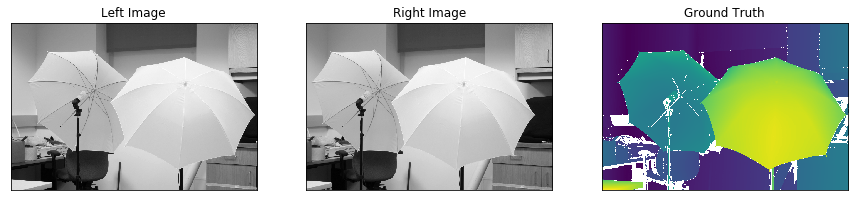

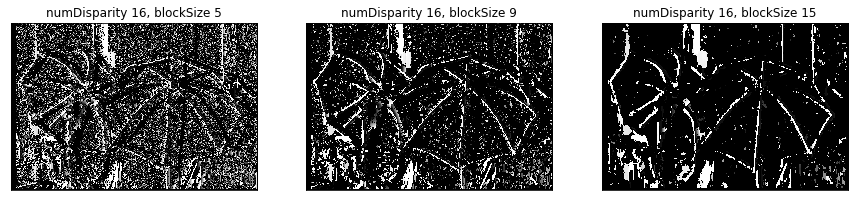

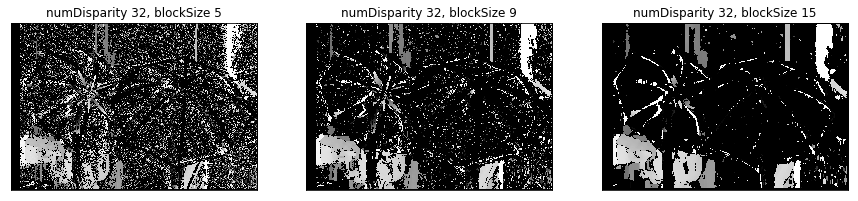

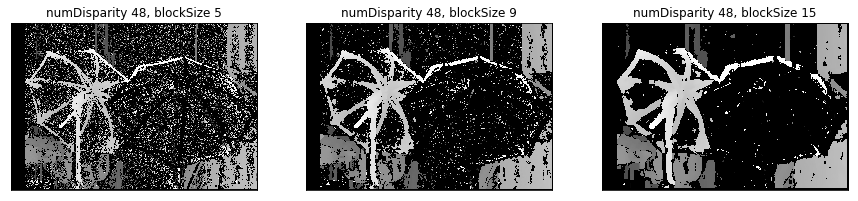

In [17]:
#imports
import sys
import re
from struct import *
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

# function to read pfm files
def read_pfm(file):
    # Adopted from https://stackoverflow.com/questions/37073108/how-to-read-pfm-files-provided-with-middlebury-dataset?rq=1
    with open(file, "rb") as f:
        # Line 1: PF=>RGB (3 channels), Pf=>Greyscale (1 channel)
        type = f.readline().decode('latin-1')
        if "PF" in type:
            channels = 3
        elif "Pf" in type:
            channels = 1
        else:
            sys.exit(1)
        # Line 2: width height
        line = f.readline().decode('latin-1')
        width, height = re.findall('\d+', line)
        width = int(width)
        height = int(height)

        # Line 3: +ve number means big endian, negative means little endian
        line = f.readline().decode('latin-1')
        BigEndian = True
        if "-" in line:
            BigEndian = False
        # Slurp all binary data
        samples = width * height * channels;
        buffer = f.read(samples * 4)
        # Unpack floats with appropriate endianness
        if BigEndian:
            fmt = ">"
        else:
            fmt = "<"
        fmt = fmt + str(samples) + "f"
        img = unpack(fmt, buffer)
        img = np.flipud(np.array(img).reshape(height, width))
    return img

# load left and right images and ground truth
imgL = cv2.imread('img0.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('img1.png', cv2.IMREAD_GRAYSCALE)
ground = read_pfm('disp0.pfm')

# resize images for fast processing
imgL = cv2.resize(imgL, None, fx=0.3, fy=0.3)
imgR = cv2.resize(imgR, None, fx=0.3, fy=0.3)
ground = cv2.resize(ground, None, fx=0.3, fy=0.3)

def computeDisparity(numdisp, blocksize):
    copyL = imgL.copy()
    copyR = imgR.copy()
    stereo = cv2.StereoBM_create(numDisparities=numdisp, blockSize=blocksize)
    disparity = stereo.compute(imgL, imgR)
    
    return disparity

img1 = computeDisparity(16,5)
img2 = computeDisparity(16,9)
img3 = computeDisparity(16,15)
img4 = computeDisparity(32,5)
img5 = computeDisparity(32,9)
img6 = computeDisparity(32,15)
img7 = computeDisparity(48,5)
img8 = computeDisparity(48,9)
img9 = computeDisparity(48,15)

# display original images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(imgL, cmap="gray"),plt.title("Left Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgR, cmap="gray"),plt.title("Right Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(ground),plt.title("Ground Truth"), plt.xticks([]), plt.yticks([])

# display disparity images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img1, cmap="gray"),plt.title("numDisparity 16, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2, cmap="gray"),plt.title("numDisparity 16, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3, cmap="gray"),plt.title("numDisparity 16, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img4, cmap="gray"),plt.title("numDisparity 32, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img5, cmap="gray"),plt.title("numDisparity 32, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img6, cmap="gray"),plt.title("numDisparity 32, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img7, cmap="gray"),plt.title("numDisparity 48, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img8, cmap="gray"),plt.title("numDisparity 48, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img9, cmap="gray"),plt.title("numDisparity 48, blockSize 15"), plt.xticks([]), plt.yticks([])
plt.show()

#### 2) For each depth-map, compute the pixel-wise squared difference error with respect to the ground-truth.

In [15]:
def squareDiffErr(img1, img2):
    err_map = (img1 - img2)** 2
    error = err_map.mean()
    
    
    return err_map, error

err_map1, err1 = squareDiffErr(ground, img1)
err_map2, err2 = squareDiffErr(ground, img2)
err_map3, err3 = squareDiffErr(ground, img3)
err_map4, err4 = squareDiffErr(ground, img4)
err_map5, err5 = squareDiffErr(ground, img5)
err_map6, err6 = squareDiffErr(ground, img6)
err_map7, err7 = squareDiffErr(ground, img7)
err_map8, err8 = squareDiffErr(ground, img8)
err_map9, err9 = squareDiffErr(ground, img9)

nan


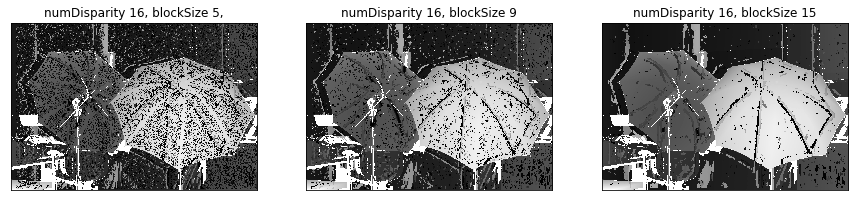

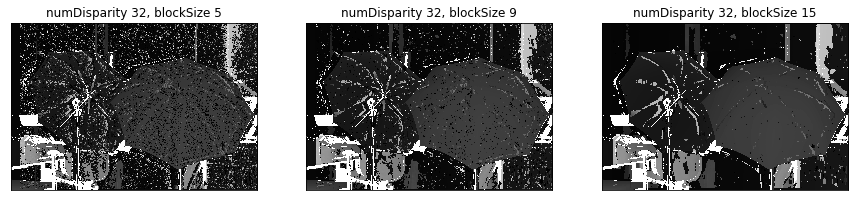

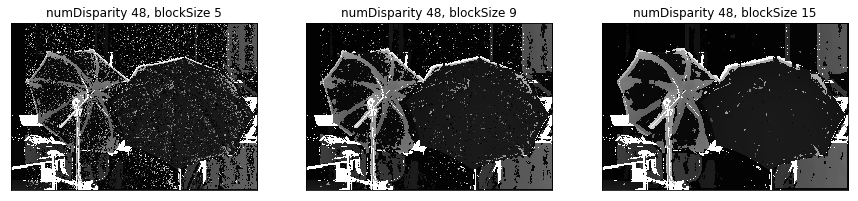

In [7]:
# display disparity images
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(err_map1, cmap="gray"),plt.title("numDisparity 16, blockSize 5," ), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(err_map2, cmap="gray"),plt.title("numDisparity 16, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(err_map3, cmap="gray"),plt.title("numDisparity 16, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(err_map4, cmap="gray"),plt.title("numDisparity 32, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(err_map5, cmap="gray"),plt.title("numDisparity 32, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(err_map6, cmap="gray"),plt.title("numDisparity 32, blockSize 15"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(err_map7, cmap="gray"),plt.title("numDisparity 48, blockSize 5"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(err_map8, cmap="gray"),plt.title("numDisparity 48, blockSize 9"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(err_map9, cmap="gray"),plt.title("numDisparity 48, blockSize 15"), plt.xticks([]), plt.yticks([])
plt.show()

## REASONING QUESTIONS

#### 3) Comment on error-maps for each combination of parameters. Specifically, mention the effects of varying the parameters on the error in the region of high/low texture, edge, large/small depths. 

The performance of the depth estimation increases with the number of disparity and the block size. Looking at the disparity parameter, higher values allow better estimation on small depth variations. Looking at blocksize, larger block sizes render more generealized results. Howoever, the squared difference error with respect to the ground truth increases with higher disparity and block size. 

When looking at textures, high texture regions have a better results when applied small block sizes. On the other hand, larger block sizes work better with low texture regions.
